# Students stress survey dataset

In [1]:
import pandas as pd

# Specify the file path
filename=r'C:\Users\lora.maillard\OneDrive - De Vinci\Documents\ESILV\Informatique\S5\Data science\Final project\Student Stress Survey Jan2020 OPENDATA.xlsx'

# Read all sheets into a dictionary
all_sheets = pd.read_excel(filename, sheet_name=None)

# Access individual sheets using dictionary keys
sheet1_df = all_sheets['Questions']
sheet2_df = all_sheets['Data']
sheet3_df = all_sheets['Demographics']
sheet4_df = all_sheets['Q9StressLevels']
sheet5_df = all_sheets['Q11Coping']
sheet6_df = all_sheets['Q12Q13']
sheet7_df = all_sheets['Q17Stressors']
sheet2_df.head()

C:\Users\lora.maillard\anaconda3\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\lora.maillard\anaconda3\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\lora.maillard\anaconda3\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\lora.maillard\anaconda3\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\lora.maillard\anaconda3\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\lora.maillard\anaconda3\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\U

,Survey responses anonymised,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q9,Q10_1,Q10_2,...,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q18
2,Gender,Ethnicity,Please state your age in years:,What is your tuition fee status?,What postgraduate qualification are you studyi...,What is your year of study?,What is your subject of study?,How often have you felt stressed over the last...,Please indicate how often you have experienced...,Please indicate how often you have experienced...,...,Please indicate how often you have experienced...,Please indicate how often you have experienced...,Please indicate how often you have experienced...,Please indicate how often you have experienced...,Please indicate how often you have experienced...,Please indicate how often you have experienced...,Please indicate how often you have experienced...,Please indicate how often you have experienced...,Please indicate how often you have experienced...,Please describe anything else that has influen...
3,Female,White,27,International,PhD,1,Arts and humanities,To a large extent,Sometimes,Almost never,...,Never,Never,Never,Sometimes,Never,Never,Very often,Almost never,Never,Being away from home as an international student
4,Female,White,26,EU,PhD,2,Computer science,Somewhat,Fairly often,Sometimes,...,Never,Sometimes,Sometimes,Sometimes,Never,Sometimes,Sometimes,Sometimes,Never,lack of holiday


**Data preprocessing**

In [2]:

# Select specific columns
selected_columns = ['Survey responses anonymised', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 21', 'Unnamed: 22']

# Keep only the selected columns
sheet2_df = sheet2_df[selected_columns]

sheet2_df = sheet2_df.rename(columns={
    'Survey responses anonymised': 'Gender',
    'Unnamed: 1': 'Ethnicity',
    'Unnamed: 2': 'Age',
    'Unnamed: 3': 'Tuition_Fee_Status',
    'Unnamed: 4': 'Postgraduate_Qualif',
    'Unnamed: 5': 'Year',
    'Unnamed: 6': 'Subject',
    'Unnamed: 7': 'Stress_freq',
    'Unnamed: 21': 'Coping',
    'Unnamed: 22': 'Support'
})
sheet2_df = sheet2_df.drop([0, 1, 2])

# Reset the index after dropping rows
sheet2_df = sheet2_df.reset_index(drop=True)
sheet2_df.head()

,Gender,Ethnicity,Age,Tuition_Fee_Status,Postgraduate_Qualif,Year,Subject,Stress_freq,Coping,Support
0,Female,White,27,International,PhD,1,Arts and humanities,To a large extent,Yes,Yes
1,Female,White,26,EU,PhD,2,Computer science,Somewhat,Yes,Yes
2,Female,White,53,UK,PhD,4,Arts and humanities,To a large extent,Yes,Yes
3,Female,Mixed / Multiple Ethnic Groups,29,UK,PhD,4,Arts and humanities,Somewhat,Yes,Not sure
4,Female,White,22,UK,Research master's degree,1,Life sciences,Somewhat,Yes,Not sure


In [3]:
from sklearn.preprocessing import LabelEncoder

# Handle missing values if needed
#sheet2_df = sheet2_df.dropna()  # For simplicity, just drop rows with any missing values

# Convert age to numeric (assuming it's in string format)
sheet2_df['Age'] = pd.to_numeric(sheet2_df['Age'], errors='coerce')
sheet2_df['Year'] = pd.to_numeric(sheet2_df['Year'], errors='coerce')

# Encode categorical variables using one-hot encoding or label encoding
label_encoder = LabelEncoder()
for column in ['Gender', 'Ethnicity', 'Tuition_Fee_Status', 'Postgraduate_Qualif', 'Subject', 'Stress_freq', 'Coping', 'Support']:
    sheet2_df[column] = label_encoder.fit_transform(sheet2_df[column])

sheet2_df.head(6)

,Gender,Ethnicity,Age,Tuition_Fee_Status,Postgraduate_Qualif,Year,Subject,Stress_freq,Coping,Support
0,0,4,27,1,1,1.0,0,2,2,2
1,0,4,26,0,1,2.0,2,1,2,2
2,0,4,53,2,1,4.0,0,2,2,2
3,0,2,29,2,1,4.0,0,1,2,1
4,0,4,22,2,2,1.0,6,1,2,1
5,0,4,22,2,3,1.0,8,1,2,2


Now we will create a dataframe of the responses to this question : 'Please indicate how often you have experienced the following over the last three months', with the following troubles:

In [4]:
sheet2 = all_sheets['Data']

selected_columns = ['Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19']
Q10_df = sheet2[selected_columns]
Q10_df = Q10_df.rename(columns={    
    'Unnamed: 8': 'Low_energy',
    'Unnamed: 9': 'Headache',
    'Unnamed: 10': 'Digestion_pb',
    'Unnamed: 11': 'Anxiety_or_tension',
    'Unnamed: 12': 'Sleep_pb',
    'Unnamed: 13': 'Rapid_heartbeat',
    'Unnamed: 14': 'Irritability',
    'Unnamed: 15': 'Concentration_pb',
    'Unnamed: 16': 'Sadness',
    'Unnamed: 17': 'Illness',
    'Unnamed: 18': 'Aches',
    'Unnamed: 19': 'Loneliness',
})
Q10_df = Q10_df.drop([0, 1, 2])

# Reset the index after dropping rows
Q10_df = Q10_df.reset_index(drop=True)
Q10_df.head()

,Low_energy,Headache,Digestion_pb,Anxiety_or_tension,Sleep_pb,Rapid_heartbeat,Irritability,Concentration_pb,Sadness,Illness,Aches,Loneliness
0,Sometimes,Almost never,Never,Fairly often,Never,Almost never,Very often,Sometimes,Sometimes,Sometimes,Almost never,Sometimes
1,Fairly often,Sometimes,Very often,Almost never,Sometimes,Never,Fairly often,Fairly often,Sometimes,Almost never,Never,Sometimes
2,Fairly often,Almost never,Sometimes,Sometimes,Sometimes,Almost never,Sometimes,Sometimes,Sometimes,Almost never,Sometimes,Sometimes
3,Sometimes,Sometimes,Almost never,Almost never,Sometimes,Sometimes,Almost never,Sometimes,Never,Never,Almost never,Never
4,Sometimes,Almost never,Sometimes,Fairly often,Almost never,Almost never,Fairly often,Almost never,Fairly often,Almost never,Almost never,Sometimes


In [5]:
from sklearn.preprocessing import LabelEncoder


columns=['Low_energy', 'Headache', 'Digestion_pb', 'Anxiety_or_tension', 'Sleep_pb', 'Rapid_heartbeat', 'Irritability', 'Concentration_pb','Sadness','Illness','Aches','Loneliness']
# Encode categorical variables using one-hot encoding or label encoding
#label_encoder = LabelEncoder()
for i in columns:
    Q10_df[i] = Q10_df[i].replace({'Never':0,'Almost never':1, 'Sometimes':2, 'Fairly often':3, 'Very often':4})

Q10_df.head()


,Low_energy,Headache,Digestion_pb,Anxiety_or_tension,Sleep_pb,Rapid_heartbeat,Irritability,Concentration_pb,Sadness,Illness,Aches,Loneliness
0,2,1,0,3,0,1,4,2,2,2,1,2
1,3,2,4,1,2,0,3,3,2,1,0,2
2,3,1,2,2,2,1,2,2,2,1,2,2
3,2,2,1,1,2,2,1,2,0,0,1,0
4,2,1,2,3,1,1,3,1,3,1,1,2


In [6]:
sheet7_df.head()

,Q17 Academic stressors,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Q1,Q2,Q3,Q5,Q6,Q7,Q8,Q17_1,Q17_2,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12
2,Gender,Ethnicity,Please state your age in years:,What is your tuition fee status?,What postgraduate qualification are you studyi...,What is your year of study?,What is your subject of study?,Feeling overloaded with university work,Spending too much time onsite at university,Competition with peers,Difficulties with supervisor or tutor,Unpleasant working environment,Criticism about work,Lack of time for relaxation,Difficult home environment,Financial issues,Lack of confidence with academic performance,Lack of confidence with subject or career choice,Conflicts between university work and extracur...
3,Female,White,27,International,PhD,1,Arts and humanities,Sometimes,Fairly often,Never,Never,Never,Never,Sometimes,Never,Never,Very often,Almost never,Never
4,Female,White,26,EU,PhD,2,Computer science,Very often,Fairly often,Almost never,Never,Sometimes,Sometimes,Sometimes,Never,Sometimes,Sometimes,Sometimes,Never


In [7]:
sheet7_df.head()
selected_columns = ['Unnamed: 7','Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18']
stressors_df = sheet7_df[selected_columns]

stressors_df = stressors_df.rename(columns={  
    'Unnamed: 7': 'overloaded_with_work',
    'Unnamed: 8': 'too_much_time_onsite',
    'Unnamed: 9': 'Competition_with_peers',
    'Unnamed: 10': 'Dif_with_supervisor',
    'Unnamed: 11': 'Unpleasant_working_envir',
    'Unnamed: 12': 'Criticism_about_work',
    'Unnamed: 13': 'Lack_of_relaxation',
    'Unnamed: 14': 'Difficult_home_envir',
    'Unnamed: 15': 'Financial_issues',
    'Unnamed: 16': 'Lack_of_conf_w_performance',
    'Unnamed: 17': 'Lack_of_conf_w_subject',
    'Unnamed: 18': 'Conflicts_btw_uni_work_and_extra'
})


stressors_df = stressors_df.drop([0, 1, 2])

# Reset the index after dropping rows
stressors_df = stressors_df.reset_index(drop=True)
# Display the modified DataFrame
stressors_df.head()



,overloaded_with_work,too_much_time_onsite,Competition_with_peers,Dif_with_supervisor,Unpleasant_working_envir,Criticism_about_work,Lack_of_relaxation,Difficult_home_envir,Financial_issues,Lack_of_conf_w_performance,Lack_of_conf_w_subject,Conflicts_btw_uni_work_and_extra
0,Sometimes,Fairly often,Never,Never,Never,Never,Sometimes,Never,Never,Very often,Almost never,Never
1,Very often,Fairly often,Almost never,Never,Sometimes,Sometimes,Sometimes,Never,Sometimes,Sometimes,Sometimes,Never
2,Very often,Almost never,Fairly often,Almost never,Sometimes,Almost never,Very often,Never,Very often,Almost never,Sometimes,Fairly often
3,Sometimes,Sometimes,Never,Almost never,Never,Almost never,Sometimes,Sometimes,Almost never,Sometimes,Sometimes,Almost never
4,Sometimes,Fairly often,Almost never,Almost never,Almost never,Sometimes,Sometimes,Never,Never,Sometimes,Fairly often,Sometimes


In [8]:
for i in stressors_df.columns:
    stressors_df[i] = stressors_df[i].replace({'Never':0,'Almost never':1, 'Sometimes':2, 'Fairly often':3, 'Very often':4})
    stressors_df[i] = pd.to_numeric(stressors_df[i], errors='coerce')

stressors_df.head()


,overloaded_with_work,too_much_time_onsite,Competition_with_peers,Dif_with_supervisor,Unpleasant_working_envir,Criticism_about_work,Lack_of_relaxation,Difficult_home_envir,Financial_issues,Lack_of_conf_w_performance,Lack_of_conf_w_subject,Conflicts_btw_uni_work_and_extra
0,2.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,1.0,0.0
1,4.0,3.0,1.0,0.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,0.0
2,4.0,1.0,3.0,1.0,2.0,1.0,4.0,0.0,4.0,1.0,2.0,3.0
3,2.0,2.0,0.0,1.0,0.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0
4,2.0,3.0,1.0,1.0,1.0,2.0,2.0,0.0,0.0,2.0,3.0,2.0


Now we will create a dataset with all the data of the preprocessed datasets that we just created.

In [9]:

# concatenation
df = pd.concat([sheet2_df, Q10_df,stressors_df ], axis=1)
# Handle missing values if needed
df = df.dropna()  # For simplicity, just drop rows with any missing values
df.head()


,Gender,Ethnicity,Age,Tuition_Fee_Status,Postgraduate_Qualif,Year,Subject,Stress_freq,Coping,Support,...,Competition_with_peers,Dif_with_supervisor,Unpleasant_working_envir,Criticism_about_work,Lack_of_relaxation,Difficult_home_envir,Financial_issues,Lack_of_conf_w_performance,Lack_of_conf_w_subject,Conflicts_btw_uni_work_and_extra
0,0.0,4.0,27.0,1.0,1.0,1.0,0.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,1.0,0.0
1,0.0,4.0,26.0,0.0,1.0,2.0,2.0,1.0,2.0,2.0,...,1.0,0.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,0.0
2,0.0,4.0,53.0,2.0,1.0,4.0,0.0,2.0,2.0,2.0,...,3.0,1.0,2.0,1.0,4.0,0.0,4.0,1.0,2.0,3.0
3,0.0,2.0,29.0,2.0,1.0,4.0,0.0,1.0,2.0,1.0,...,0.0,1.0,0.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0
4,0.0,4.0,22.0,2.0,2.0,1.0,6.0,1.0,2.0,1.0,...,1.0,1.0,1.0,2.0,2.0,0.0,0.0,2.0,3.0,2.0


In [10]:
highest_age = df['Age'].max()
print(f"The highest age in the DataFrame is: {highest_age}")
# There is a mistake in the data, one age is 1987 so we modify it to be 33 because the data is from 2020
df.loc[df['Age'] == 1987, 'Age'] = 33
print(f"The highest age in the DataFrame is: {highest_age}")


The highest age in the DataFrame is: 1987.0
The highest age in the DataFrame is: 1987.0


highest_age = df['Age'].max()
print(f"The highest age in the DataFrame is: {highest_age}")
Now we are ready to analyze the data.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 0 to 217
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Gender                            210 non-null    float64
 1   Ethnicity                         210 non-null    float64
 2   Age                               210 non-null    float64
 3   Tuition_Fee_Status                210 non-null    float64
 4   Postgraduate_Qualif               210 non-null    float64
 5   Year                              210 non-null    float64
 6   Subject                           210 non-null    float64
 7   Stress_freq                       210 non-null    float64
 8   Coping                            210 non-null    float64
 9   Support                           210 non-null    float64
 10  Low_energy                        210 non-null    float64
 11  Headache                          210 non-null    float64
 12  Digestio

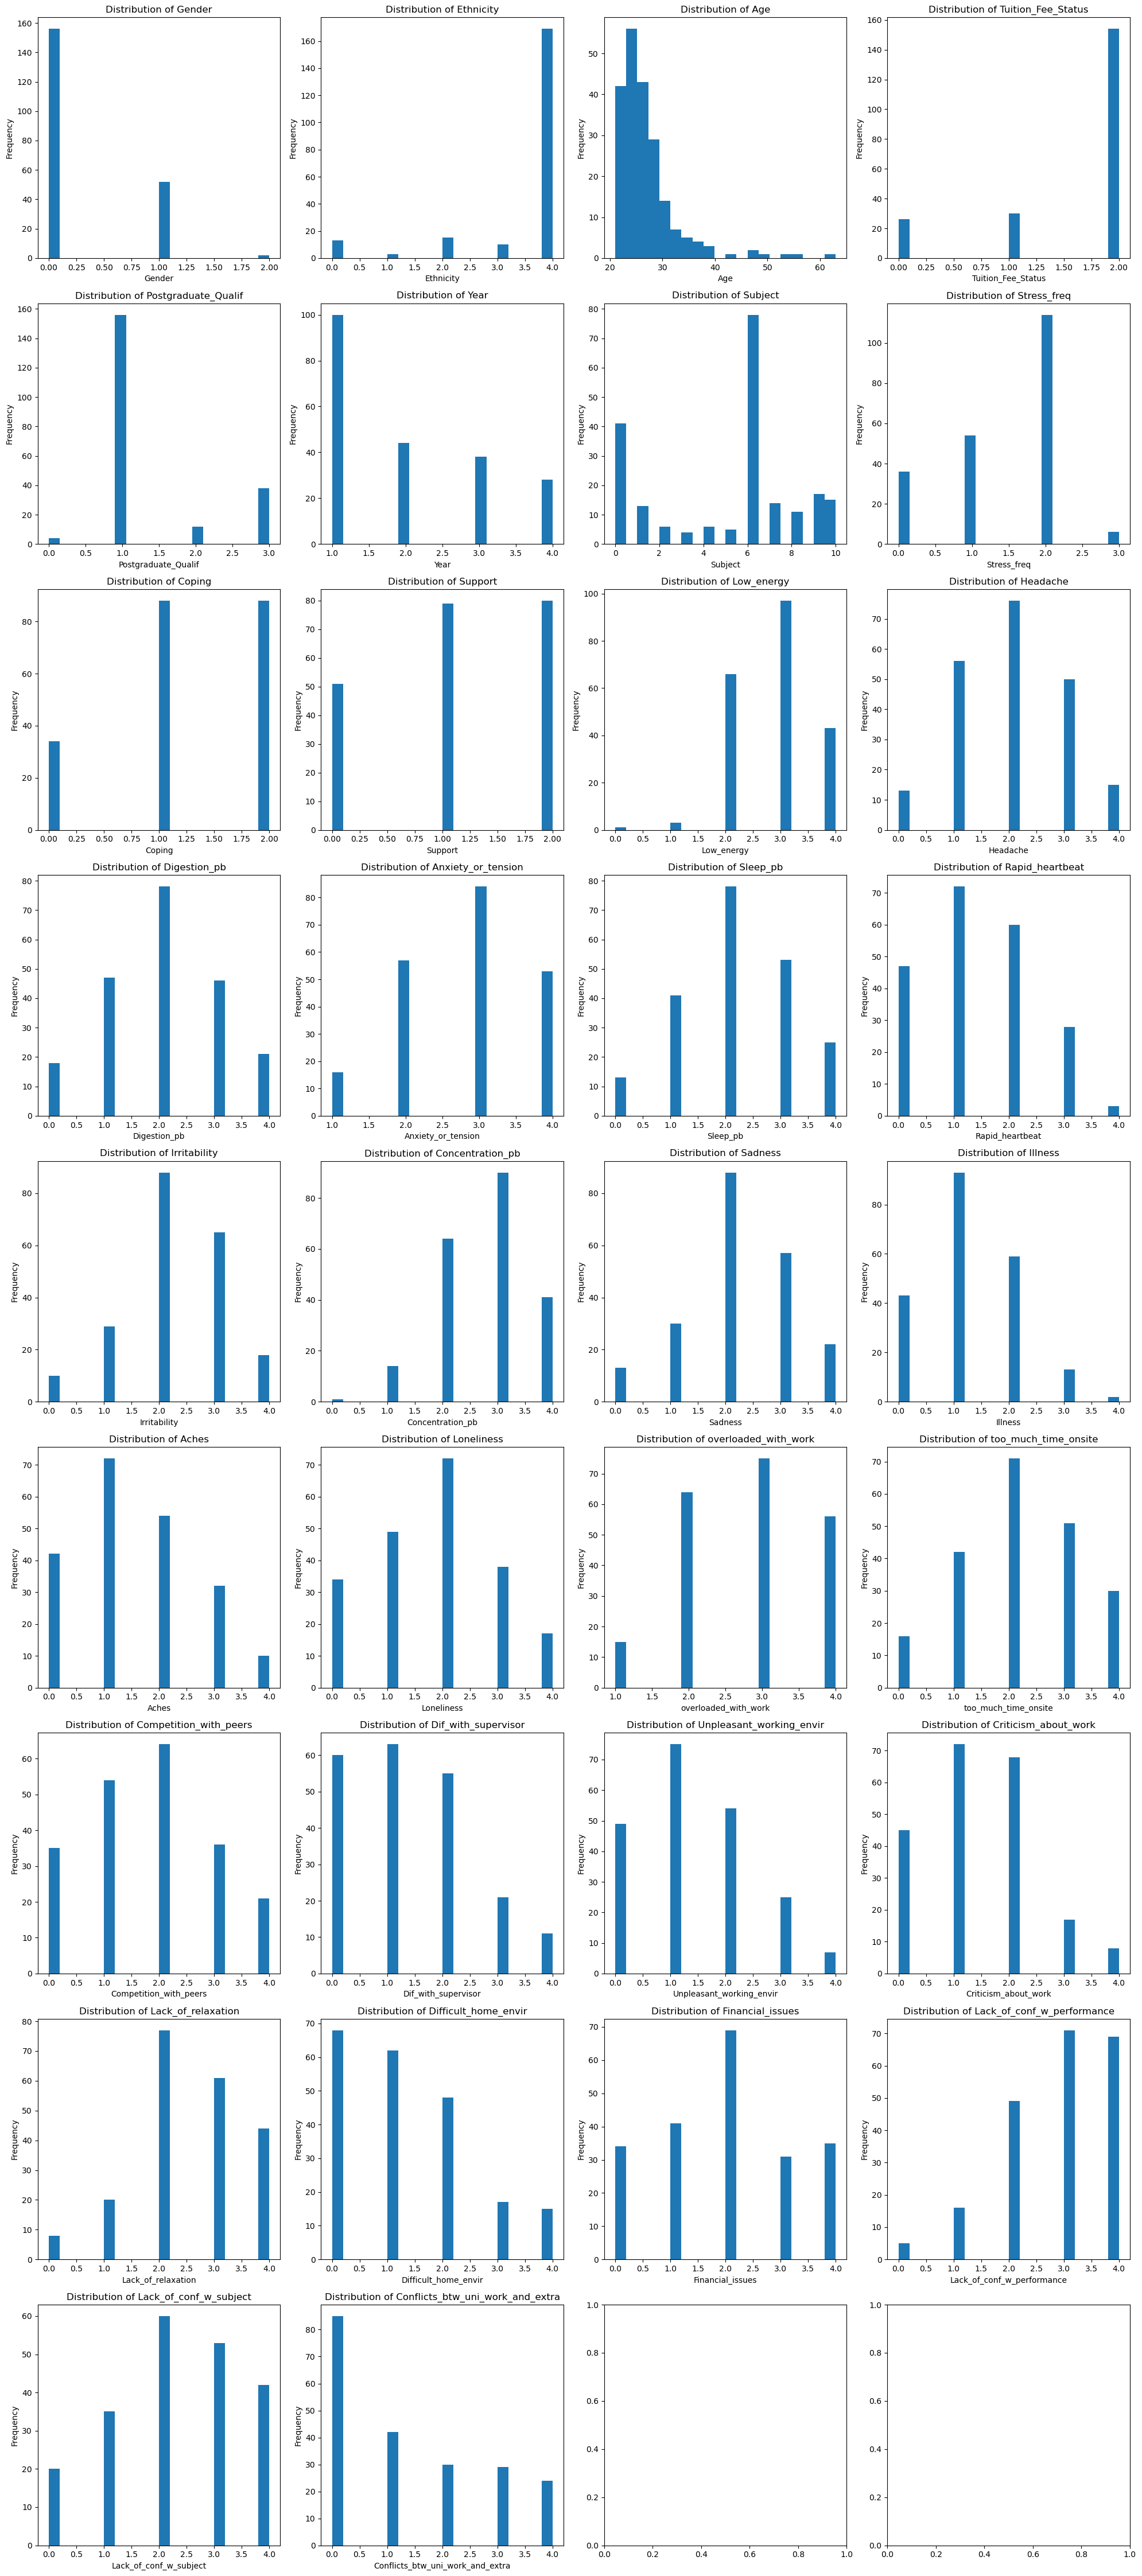

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame

# Get the number of columns for subplots
num_cols = len(df.columns)
nb_row=4
# Calculate the number of rows and columns for subplots
num_rows = (num_cols // nb_row) + 1  # You can adjust the number of columns per row

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=nb_row, figsize=(20, 5 * num_rows))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate through each column and plot
for i, column in enumerate(df.columns):
    axes[i].hist(df[column], bins=20)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


**Machine learning to predict mental health problems**

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df is your DataFrame with the features and target variable

# Define features and target
features = [
    'Gender', 'Ethnicity', 'Age', 'Tuition_Fee_Status', 'Postgraduate_Qualif',
    'Year', 'Subject',  'Coping', 'Support',
    'overloaded_with_work', 'too_much_time_onsite',
    'Competition_with_peers', 'Dif_with_supervisor', 'Unpleasant_working_envir',
    'Criticism_about_work', 'Lack_of_relaxation', 'Difficult_home_envir',
    'Financial_issues', 'Lack_of_conf_w_performance', 'Lack_of_conf_w_subject',
    'Conflicts_btw_uni_work_and_extra'
]
#'Stress_freq','Low_energy', 'Headache', 'Digestion_pb', 'Anxiety_or_tension', 'Sleep_pb','Rapid_heartbeat',
# 'Irritability', 'Concentration_pb', 'Sadness', 'Illness',  'Aches', 'Loneliness', 
X = df[features]
y = df['Stress_freq']  # target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.5476190476190477
Confusion Matrix:
[[ 1  0  4  0]
 [ 0  4  9  0]
 [ 0  5 18  0]
 [ 0  0  1  0]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.20      0.33         5
         1.0       0.44      0.31      0.36        13
         2.0       0.56      0.78      0.65        23
         3.0       0.00      0.00      0.00         1

    accuracy                           0.55        42
   macro avg       0.50      0.32      0.34        42
weighted avg       0.56      0.55      0.51        42



C:\Users\lora.maillard\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lora.maillard\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lora.maillard\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
